In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Рассчитать базовые статистики:

Вычислите средний возраст пассажиров, медиану, стандартное отклонение и размах. Выведите эти значения.

Считывает данные из файла

In [ ]:
titanic = pd.read_csv('titanic.csv')


Вычисляет средний возраст

In [ ]:
avg_age = titanic['Age'].mean()
avg_age

29.471443066516347

Вычисляет медиану

In [ ]:
mediana = titanic['Age'].median()
mediana

28.0

Вычисляет стандартное отклонение

In [ ]:
std = titanic['Age'].std()
std

14.121908405462555

Вычисляет размах

In [ ]:
range = titanic['Age'].max() - titanic['Age'].min()
range

79.58

# 2. Определить выживаемость:

Рассчитайте долю выживших (столбец Survived) относительно общего числа пассажиров. Выведите результат в процентах.

Вычисляет процент выживших от общего числа пассажиров

In [ ]:
percentage_of_survivors = (titanic['Survived'].sum() / titanic['Name'].count()) * 100
percentage_of_survivors

38.55693348365276

# 3. Найти пассажиров, выживших в третьем классе, которые путешествовали без родственников

In [ ]:

solo_adventurers = titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 3) & (titanic['Siblings/Spouses Aboard'] == 0) & (titanic['Parents/Children Aboard'] == 0)]
solo_adventurers

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
19,1,3,Mrs. Fatima Masselmani,female,22.0,0,0,7.2250
22,1,3,Miss. Anna McGowan,female,15.0,0,0,8.0292
28,1,3,Miss. Ellen O'Dwyer,female,24.0,0,0,7.8792
32,1,3,Miss. Mary Agatha Glynn,female,18.0,0,0,7.7500
...,...,...,...,...,...,...,...,...
800,1,3,Mr. Oskar Arvid Hedman,male,27.0,0,0,6.9750
817,1,3,Mr. Nikola Lulic,male,27.0,0,0,8.6625
824,1,3,Mr. Thomas Joseph McCormack,male,19.0,0,0,7.7500
834,1,3,Mr. Chang Chip,male,32.0,0,0,56.4958


# 4. Распределение классов:

Постройте гистограмму распределения пассажиров по классу (Pclass): посчитайте, сколько в каждом классе было пассажиров и отобразите это графически.

Вычисляет количество выживших в каждом классе

In [ ]:
class_1_series = titanic[titanic['Pclass'] == 1]
count_class_1 = class_1_series['Pclass'].count()

class_2_series  = titanic[titanic['Pclass'] == 2]
count_class_2 = class_2_series['Pclass'].count()

class_3_series  = titanic[titanic['Pclass'] == 3]
count_class_3 = class_3_series['Pclass'].count()

count_people = [count_class_1, count_class_2, count_class_3]
classes = ['class_1', 'class_2', 'class_3']


График количества выживших в каждом классе

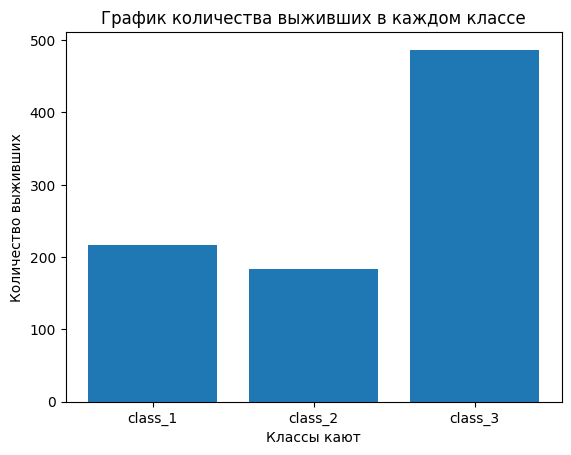

In [ ]:
plt.bar(classes, count_people)
plt.title('График количества выживших в каждом классе')
plt.xlabel('Классы кают')
plt.ylabel('Количество выживших')
plt.show()

# 5. Определить пассажиров, которые либо заплатили больше 100 за билет, либо были в первом классе, но не выжили

In [ ]:
people = titanic[ (titanic['Fare'] > 100) | ((titanic['Pclass'] == 1) & (titanic['Survived'] == 0)) ]
people

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
27,0,1,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000
30,0,1,Don. Manuel E Uruchurtu,male,40.0,0,0,27.7208
31,1,1,Mrs. William Augustus (Marie Eugenie) Spencer,female,48.0,1,0,146.5208
34,0,1,Mr. Edgar Joseph Meyer,male,28.0,1,0,82.1708
...,...,...,...,...,...,...,...,...
811,0,1,Mr. Richard Fry,male,39.0,0,0,0.0000
818,0,1,Jonkheer. John George Reuchlin,male,38.0,0,0,0.0000
852,1,1,Mrs. George Dennick (Mary Hitchcock) Wick,female,45.0,1,1,164.8667
863,0,1,Mr. Washington Augustus II Roebling,male,31.0,0,0,50.4958


# 6. Распределение выживаемости по полу:

Постройте столбчатую диаграмму, показывающую выживаемость пассажиров (сгруппированных по полу - колонка Sex): посчитайте, сколько пассажиров выжило и визуально отобразите это с учетом их пола. Указание: изучите метод groupby() у объектов DataFrame

Вычисляет количество выживших мужчин и количество женщин

In [ ]:
groups = titanic.groupby('Sex')
survived = groups['Survived'].sum()

count_survived_m = survived['male']
count_survived_f = survived['female']

lst_count_survived = [count_survived_m, count_survived_f]
lst_sex = ['male', 'female']

График количества выживших мужчин и женщин


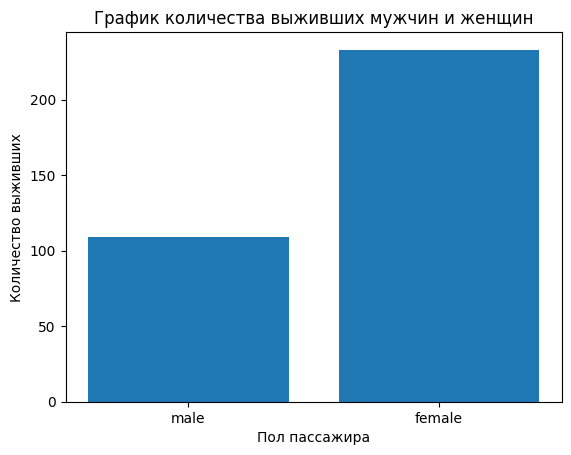

In [ ]:
plt.bar(lst_sex, lst_count_survived)
plt.title('График количества выживших мужчин и женщин')
plt.xlabel('Пол пассажира')
plt.ylabel('Количество выживших')
plt.show()

# 7. Вывести пассажиров, которые либо путешествовали с более чем двумя родственниками, либо находились в первом классе, но при этом заплатили за билет меньше 20

In [ ]:
people = titanic[((titanic['Parents/Children Aboard'] > 2) | (titanic['Siblings/Spouses Aboard'] > 2)) | ((titanic['Pclass'] == 1) & (titanic['Fare'] < 20))]
people

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
13,0,3,Mr. Anders Johan Andersson,male,39.0,1,5,31.2750
16,0,3,Master. Eugene Rice,male,2.0,4,1,29.1250
24,0,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750
25,1,3,Mrs. Carl Oscar (Selma Augusta Emilia Johansso...,female,38.0,1,5,31.3875
...,...,...,...,...,...,...,...,...
846,0,3,Master. Sigvard Harald Elias Andersson,male,4.0,4,2,31.2750
854,1,3,Mrs. Solomon (Latifa Qurban) Baclini,female,24.0,0,3,19.2583
859,0,3,Miss. Dorothy Edith Sage,female,14.0,8,2,69.5500
868,0,1,Mr. Frans Olof Carlsson,male,33.0,0,0,5.0000


# 8. Различные зависимости:

a. Построить точечный график, отображающий распределение стоимости билетов (Fare) в зависимости от возраста (Age) для выживших и погибших пассажиров. Использовать разные цвета для обозначения выживших и погибших

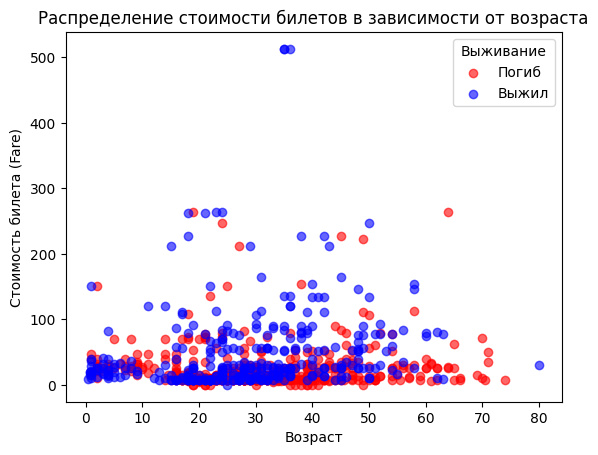

In [ ]:
plt.scatter(titanic[titanic['Survived'] == 0]['Age'],
            titanic[titanic['Survived'] == 0]['Fare'],
            color='red', alpha=0.6, label='Погиб')

plt.scatter(titanic[titanic['Survived'] == 1]['Age'],
            titanic[titanic['Survived'] == 1]['Fare'],
            color='blue', alpha=0.6, label='Выжил')

plt.title('Распределение стоимости билетов в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета (Fare)')
plt.legend(title='Выживание')
plt.show()

b. Постройте гистограмму средней стоимости билета (Fare) в зависимости от класса билета (Pclass)

In [ ]:
class_1 = titanic[titanic['Pclass'] == 1]['Fare'].mean()
class_2 = titanic[titanic['Pclass'] == 2]['Fare'].mean()
class_3 = titanic[titanic['Pclass'] == 3]['Fare'].mean()


lst_avg_price = [class_1, class_2, class_3]
lst_classes = [1, 2, 3]

Гистограмма средней стоимости билета в зависимости от класса билета

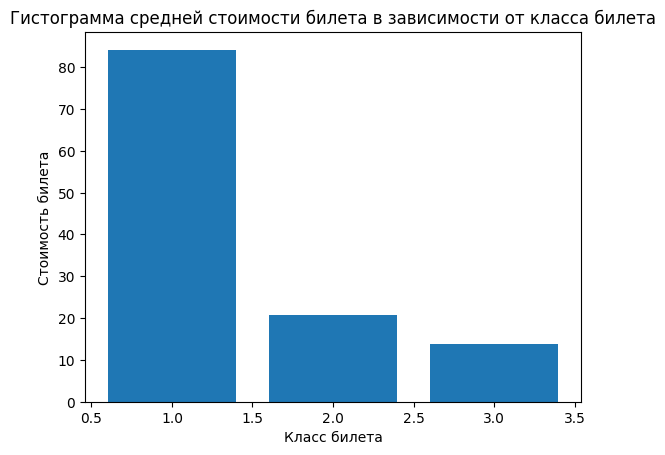

In [ ]:
plt.bar(lst_classes, lst_avg_price)
plt.title('Гистограмма средней стоимости билета в зависимости от класса билета')
plt.xlabel('Класс билета')
plt.ylabel('Стоимость билета')
plt.show()


# 9. Найти пассажиров, не входящих в возрастной диапазон от 18 до 50 лет и выживших

In [63]:
people = titanic[(titanic['Age'] < 18) & (titanic['Age'] > 50) & (titanic['Pclass'] == 1)]
people

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
